# Importing Libraries 

In [1]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Removing Whitespaces and tokenization 

In [2]:
# Function to remove leading/trailing whitespace and reduce multiple spaces
def remove_whitespaces(text):
    return re.sub(r'\s+', ' ', text.strip())

# Function to tokenize text
def tokenize(text):
    # First, removes whitespaces
    text = remove_whitespaces(text)
    # Splits the text into tokens based on spaces
    return text.split()


In [3]:
# Loads the data from the JSON files
with open('preprocessedRedditData.json', 'r') as jsonFile:
    redditData = json.load(jsonFile)

with open('preprocessedYoutubeData.json', 'r') as jsonFile:
    youtubeData = json.load(jsonFile)


In [4]:
# Removes whitespaces from fields in the Reddit data
for entry in redditData:
    entry['title'] = remove_whitespaces(entry['title'])  
    entry['date'] = remove_whitespaces(entry['date'])    
    entry['keyword'] = remove_whitespaces(entry['keyword'])  
    for comment in entry['comments']:
        comment['comment_body'] = remove_whitespaces(comment['comment_body']) 

# Tokenizes fields in the Reddit data
for entry in redditData:
    entry['title_tokens'] = tokenize(entry['title'])  # Tokenize title
    entry['keyword_tokens'] = tokenize(entry['keyword'])  # Tokenize keyword
    for comment in entry['comments']:
        comment['comment_tokens'] = tokenize(comment['comment_body'])  # Tokenize comments

 #Can't print Reddit tokens as there is too many 


In [5]:
# Removes whitespaces from fields in the YouTube data
for entry in youtubeData:
    entry['title'] = remove_whitespaces(entry['title'])  # Removes whitespaces from title
    entry['date'] = remove_whitespaces(entry['date'])    # Removes whitespaces from date
    entry['keyword'] = remove_whitespaces(entry['keyword'])  # Removes whitespaces from keyword
    for comment in entry['comments']:
        comment['comment_body'] = remove_whitespaces(comment['comment_body'])  # Removes whitespaces from comments

# Tokenizes fields in the YouTube data
for entry in youtubeData:
    entry['title_tokens'] = tokenize(entry['title'])  # Tokenize title
    entry['keyword_tokens'] = tokenize(entry['keyword'])  # Tokenize keyword
    for comment in entry['comments']:
        comment['comment_tokens'] = tokenize(comment['comment_body'])  # Tokenize comments

 


In [6]:
# Saves the cleaned and tokenized data back to the preprocessed JSON files
with open('preprocessedRedditData.json', 'w') as jsonFile:
    json.dump(redditData, jsonFile, indent=4)

with open('preprocessedYoutubeData.json', 'w') as jsonFile:
    json.dump(youtubeData, jsonFile, indent=4)

print("Whitespaces removed, tokens created for all relevant fields, and data saved successfully.")


Whitespaces removed, tokens created for all relevant fields, and data saved successfully.


# Term Frequency, Document Frequency and TFIDF analysis 

In [7]:
# Prepares the comments for TF-IDF calculation
reddit_comments = [' '.join([comment['comment_body'] for comment in entry['comments']]) for entry in redditData]
youtube_comments = [' '.join([comment['comment_body'] for comment in entry['comments']]) for entry in youtubeData]


In [8]:

# Creates a TF-IDF Vectorizer for Reddit
tfidf_vectorizer_reddit = TfidfVectorizer()
reddit_tfidf_matrix = tfidf_vectorizer_reddit.fit_transform(reddit_comments)

# Calculates Document Frequency for Reddit
reddit_df = np.count_nonzero(reddit_tfidf_matrix.toarray(), axis=0)  # Document Frequency
df_terms_reddit = tfidf_vectorizer_reddit.get_feature_names_out()

# Creates a DataFrame for Reddit DF
reddit_df_table = pd.DataFrame({
    'term': df_terms_reddit,
    'doc_freq': reddit_df
})

# Sorts the DataFrame by document frequency and get the top terms
reddit_df_table_sorted = reddit_df_table.sort_values(by='doc_freq', ascending=False).head(20)


In [9]:
# Displays the DataFrame for Reddit
print("Top Terms and Document Frequencies for Reddit:")
print(reddit_df_table_sorted)


Top Terms and Document Frequencies for Reddit:
         term  doc_freq
21377    like      1114
26126     one      1053
15040     get      1051
18120      im      1026
10399    dont       996
42785   would       994
38534    time       976
12192    even       971
15528    good       964
22297    make       963
30373  really       958
38266   think       929
27511  people       921
20523    know       917
1147     also       914
38248   thing       905
24264    much       898
33396     see       895
41883     way       889
41688    want       880


In [10]:
# Creates TF-IDF DataFrame for Reddit
reddit_tfidf_array = reddit_tfidf_matrix.toarray()
reddit_tfidf_table = pd.DataFrame(reddit_tfidf_array, columns=df_terms_reddit)

# Displays the top TF-IDF scores for Reddit
reddit_tfidf_mean = reddit_tfidf_table.mean(axis=0).sort_values(ascending=False)
reddit_tfidf_table_sorted = pd.DataFrame({
    'term': reddit_tfidf_mean.index,
    'tfidf_score': reddit_tfidf_mean.values
}).head(20)


In [11]:
# Displays the DataFrame for Reddit TF-IDF
print("\nTop Terms and TF-IDF Scores for Reddit:")
print(reddit_tfidf_table_sorted)



Top Terms and TF-IDF Scores for Reddit:
      term  tfidf_score
0     game     0.075008
1     like     0.053106
2       ai     0.042016
3   people     0.037326
4      get     0.037109
5       im     0.034642
6     dont     0.032942
7      one     0.029992
8    would     0.028637
9     time     0.027755
10     oop     0.024803
11   thing     0.024082
12    even     0.023293
13    make     0.023080
14    good     0.022929
15  really     0.022665
16   think     0.022644
17    play     0.021842
18    need     0.021698
19    know     0.021522


In [12]:
# Creates a TF-IDF Vectorizer for YouTube
tfidf_vectorizer_youtube = TfidfVectorizer()
youtube_tfidf_matrix = tfidf_vectorizer_youtube.fit_transform(youtube_comments)

# Calculates Document Frequency for YouTube
youtube_df = np.count_nonzero(youtube_tfidf_matrix.toarray(), axis=0)  # Document Frequency
df_terms_youtube = tfidf_vectorizer_youtube.get_feature_names_out()

# Creates a DataFrame for YouTube DF
youtube_df_table = pd.DataFrame({
    'term': df_terms_youtube,
    'doc_freq': youtube_df
})

# Sorts the DataFrame by document frequency and get the top terms
youtube_df_table_sorted = youtube_df_table.sort_values(by='doc_freq', ascending=False).head(20)


In [13]:
# Displays the DataFrame for YouTube
print("\nTop Terms and Document Frequencies for YouTube:")
print(youtube_df_table_sorted)



Top Terms and Document Frequencies for YouTube:
         term  doc_freq
3689     game        92
5361     like        86
4530       im        84
3828      get        81
9927    video        79
3915     good        78
6425      one        78
2598     dont        77
6884     play        75
6207      new        74
5583     make        73
5464     look        71
9330     time        70
6729   people        70
7448   really        69
3041     even        68
6173     need        68
10375    year        67
1299     cant        67
10298   would        66


In [14]:
# Creates TF-IDF DataFrame for YouTube
youtube_tfidf_array = youtube_tfidf_matrix.toarray()
youtube_tfidf_table = pd.DataFrame(youtube_tfidf_array, columns=df_terms_youtube)

# Displays the top TF-IDF scores for YouTube
youtube_tfidf_mean = youtube_tfidf_table.mean(axis=0).sort_values(ascending=False)
youtube_tfidf_table_sorted = pd.DataFrame({
    'term': youtube_tfidf_mean.index,
    'tfidf_score': youtube_tfidf_mean.values
}).head(20)


In [15]:
# Displays the DataFrame for YouTube TF-IDF
print("\nTop Terms and TF-IDF Scores for YouTube:")
print(youtube_tfidf_table_sorted)



Top Terms and TF-IDF Scores for YouTube:
      term  tfidf_score
0     game     0.175143
1     like     0.069947
2       ai     0.064016
3     look     0.052627
4    video     0.040979
5       im     0.039739
6     play     0.032834
7     good     0.031766
8     dont     0.030544
9     make     0.029575
10     one     0.028978
11     get     0.026181
12    year     0.025889
13    time     0.025244
14  really     0.024320
15    doom     0.024203
16     new     0.023965
17   would     0.023168
18     bro     0.022253
19    know     0.022166


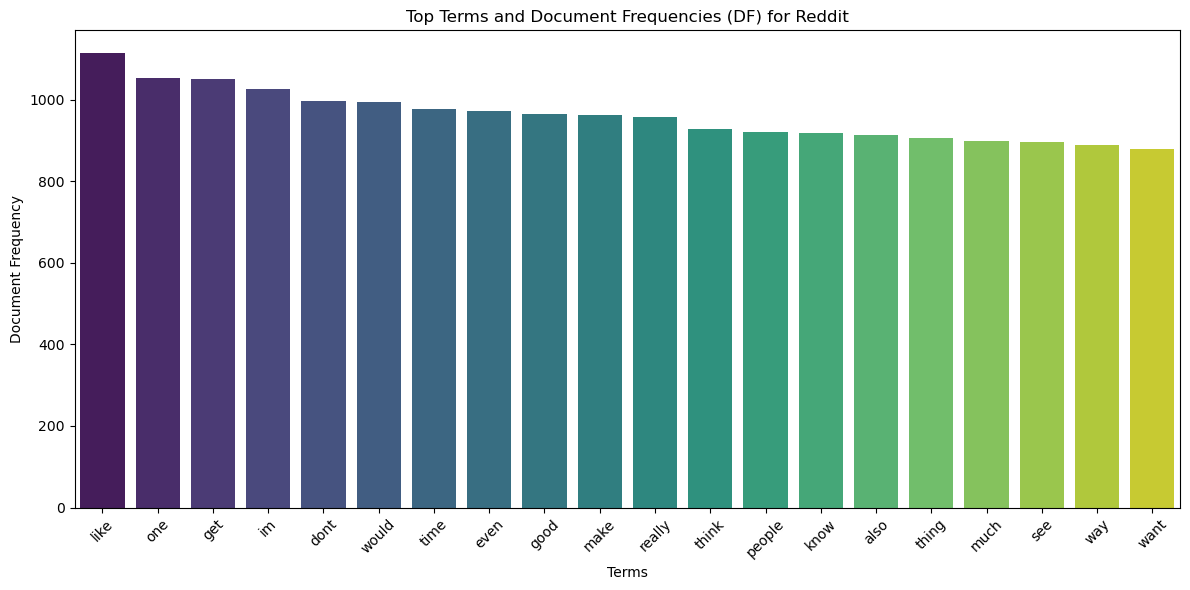

In [16]:
# Visualizing Document Frequencies (DF) for Reddit
plt.figure(figsize=(12, 6))
sns.barplot(x=reddit_df_table_sorted['term'], y=reddit_df_table_sorted['doc_freq'], palette='viridis')
plt.title("Top Terms and Document Frequencies (DF) for Reddit")
plt.xlabel("Terms")
plt.ylabel("Document Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


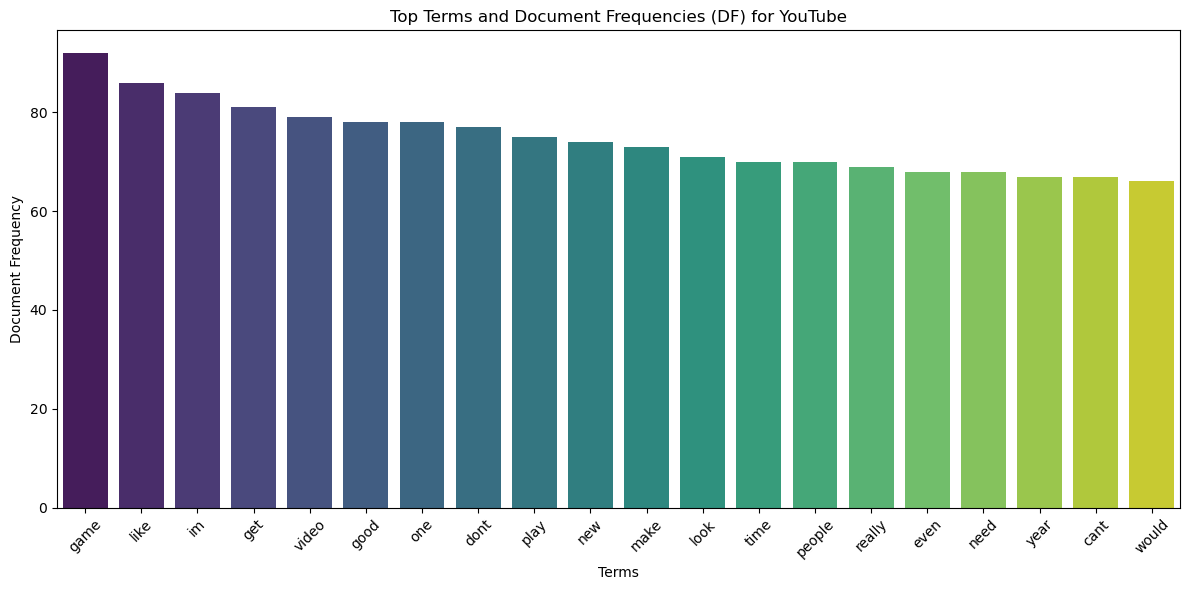

In [17]:
# Visualizing Document Frequencies (DF) for YouTube
plt.figure(figsize=(12, 6))
sns.barplot(x=youtube_df_table_sorted['term'], y=youtube_df_table_sorted['doc_freq'], palette='viridis')
plt.title("Top Terms and Document Frequencies (DF) for YouTube")
plt.xlabel("Terms")
plt.ylabel("Document Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


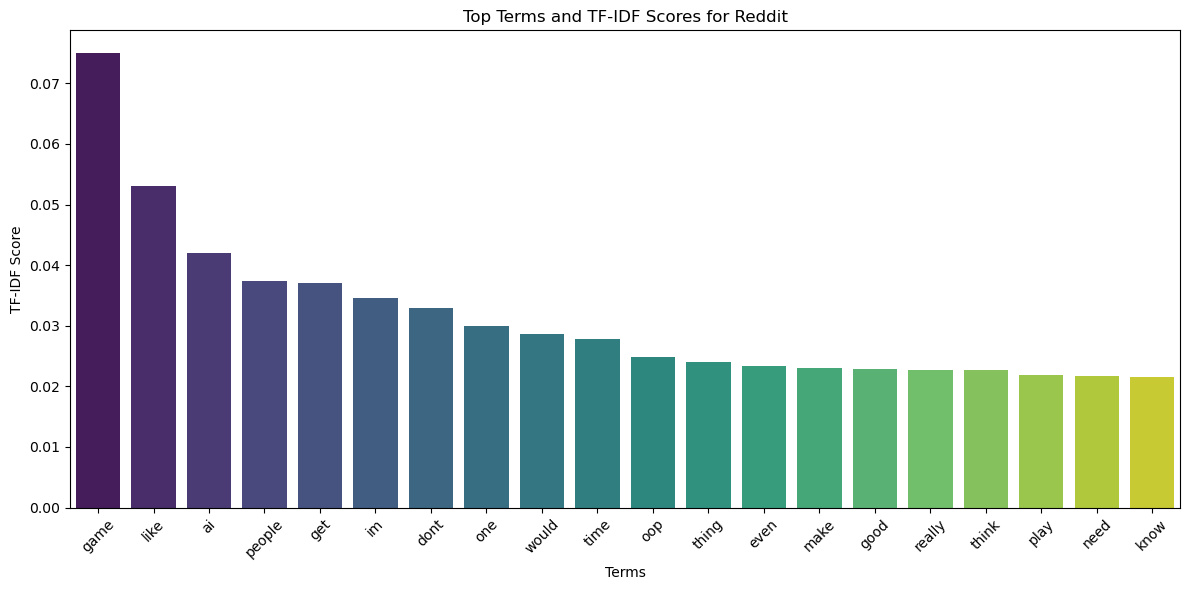

In [18]:
# Visualizing TF-IDF Scores for Reddit
plt.figure(figsize=(12, 6))
sns.barplot(x=reddit_tfidf_table_sorted['term'], y=reddit_tfidf_table_sorted['tfidf_score'], palette='viridis')
plt.title("Top Terms and TF-IDF Scores for Reddit")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


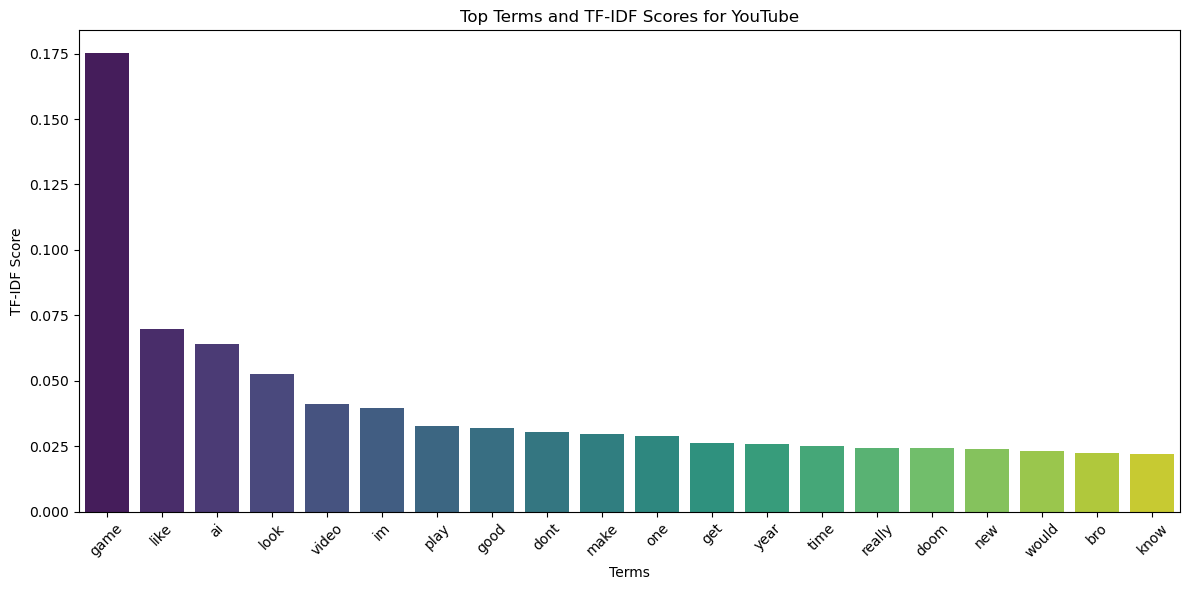

In [19]:
# Visualizing TF-IDF Scores for YouTube
plt.figure(figsize=(12, 6))
sns.barplot(x=youtube_tfidf_table_sorted['term'], y=youtube_tfidf_table_sorted['tfidf_score'], palette='viridis')
plt.title("Top Terms and TF-IDF Scores for YouTube")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Time series analysis 

In [20]:
# Extracting dates and count the number of comments for each date in Reddit
reddit_date_counts = {}
for entry in redditData:
    date = entry['date']  
    comment_count = len(entry['comments'])  # Counts the number of comments
    if date in reddit_date_counts:
        reddit_date_counts[date] += comment_count  # Adds to existing count
    else:
        reddit_date_counts[date] = comment_count  # Initializing the count

# Converting the date counts into a DataFrame
reddit_dates_df = pd.DataFrame(list(reddit_date_counts.items()), columns=['date', 'comment_count'])
reddit_dates_df['date'] = pd.to_datetime(reddit_dates_df['date'])
reddit_dates_df = reddit_dates_df.sort_values('date')


In [21]:
# Extracting dates and count the number of comments for each date in YouTube
youtube_date_counts = {}
for entry in youtubeData:
    date = entry['date'] 
    comment_count = len(entry['comments'])  # Counts the number of comments
    if date in youtube_date_counts:
        youtube_date_counts[date] += comment_count  # Adds to existing count
    else:
        youtube_date_counts[date] = comment_count  # Initializing the count

# Converting the date counts into a DataFrame
youtube_dates_df = pd.DataFrame(list(youtube_date_counts.items()), columns=['date', 'comment_count'])
youtube_dates_df['date'] = pd.to_datetime(youtube_dates_df['date'])
youtube_dates_df = youtube_dates_df.sort_values('date')


In [22]:
# Aggregating data to weekly counts for Reddit
reddit_dates_df.set_index('date', inplace=True)
reddit_weekly_df = reddit_dates_df.resample('W').sum().reset_index()

# Aggregating data to weekly counts for YouTube
youtube_dates_df.set_index('date', inplace=True)
youtube_weekly_df = youtube_dates_df.resample('W').sum().reset_index()


C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

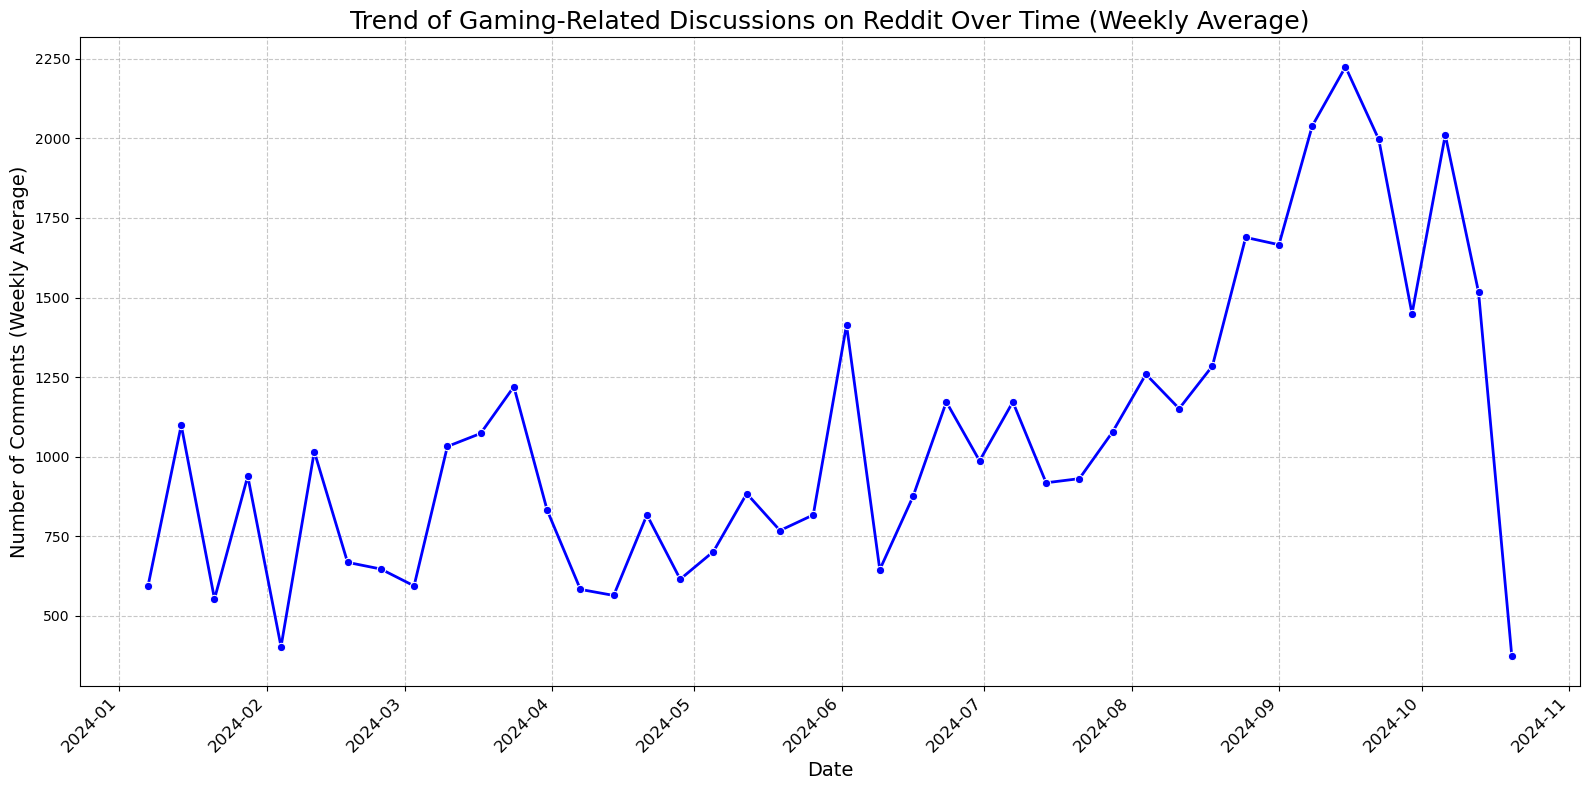

In [66]:
# Visualizing weekly average time series data for Reddit
plt.figure(figsize=(16, 8))

# Plotting the data with a thicker line
sns.lineplot(data=reddit_weekly_df, x='date', y='comment_count', marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Title and labels
plt.title("Trend of Gaming-Related Discussions on Reddit Over Time (Weekly Average)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Comments (Weekly Average)", fontsize=14)

# Enhancing x-axis date formatting
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


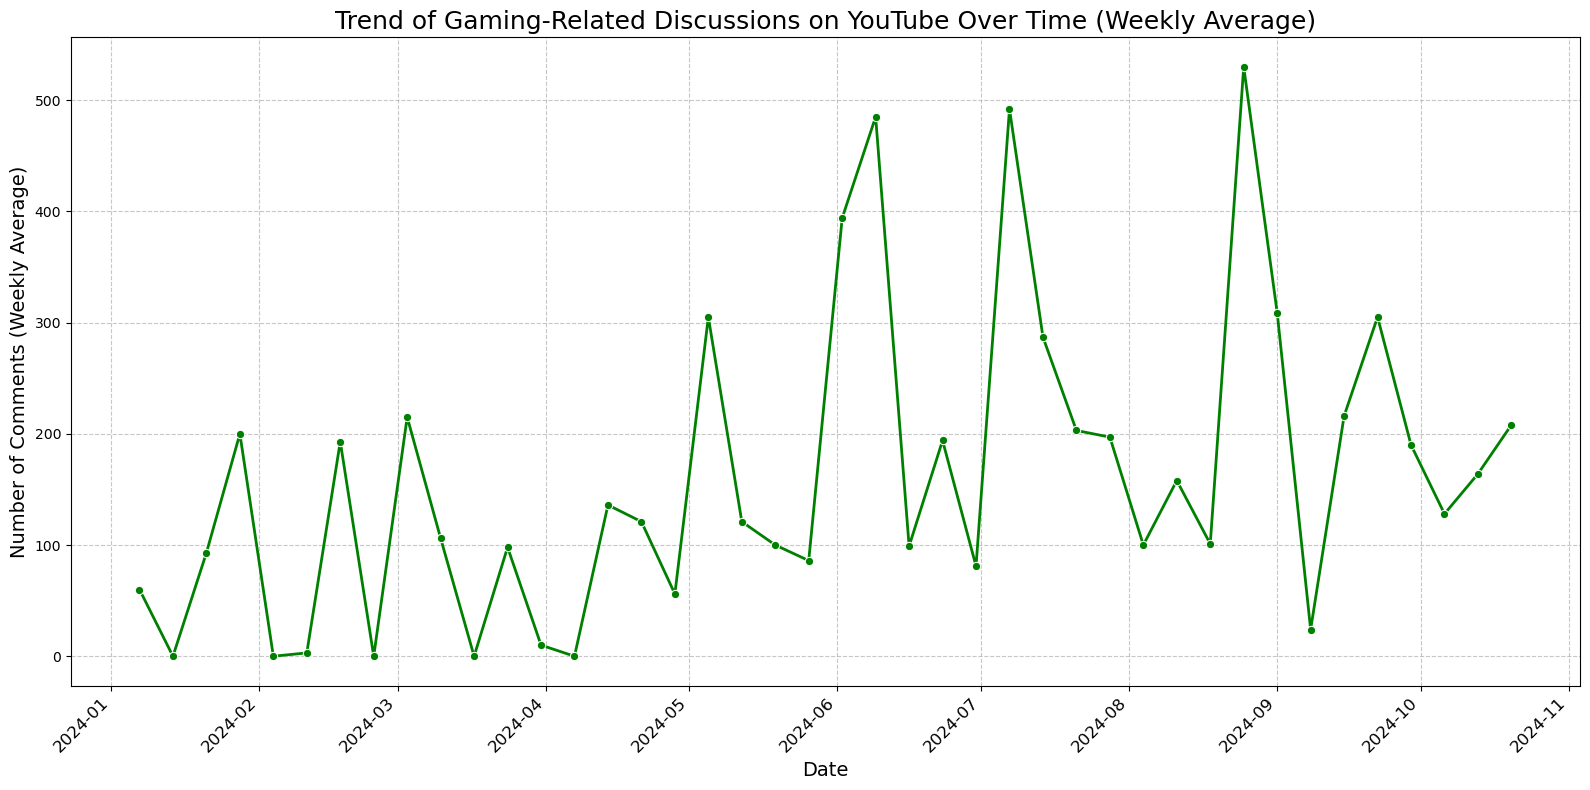

In [24]:
# Visualizing weekly average time series data for YouTube
plt.figure(figsize=(16, 8))

# Plotting the data with a thicker line
sns.lineplot(data=youtube_weekly_df, x='date', y='comment_count', marker='o', linestyle='-', color='g', markersize=6, linewidth=2)

# Title and labels
plt.title("Trend of Gaming-Related Discussions on YouTube Over Time (Weekly Average)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Comments (Weekly Average)", fontsize=14)

# Enhancing x-axis date formatting
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Sentiment Analysis 

In [25]:
#Importing 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Downloading VADER lexicon 
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# Initializing VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Analyzing sentiment for Reddit comments
reddit_comments_with_sentiment = []
for entry in redditData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  # Get sentiment scores
        comment['sentiment_score'] = score['compound']  # Store the compound score
        reddit_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
reddit_comments_df = pd.DataFrame(reddit_comments_with_sentiment)


In [27]:
# Calculating positive, neutral, and negative sentiment scores for Reddit comments
reddit_comments_df['positive'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
reddit_comments_df['neutral'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x == 0 else 0)
reddit_comments_df['negative'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x < 0 else 0)

# Grouping by comments to get the total count for each sentiment
reddit_sentiment_summary = reddit_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
reddit_sentiment_summary.columns = ['Sentiment', 'Count']

# Display the sentiment summary for Reddit
print("Reddit Sentiment Summary:")
print(reddit_sentiment_summary)


Reddit Sentiment Summary:
  Sentiment  Count
0  positive  22862
1   neutral   7486
2  negative  13924


In [28]:
# Analyzing sentiment for YouTube comments
youtube_comments_with_sentiment = []
for entry in youtubeData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  # Get sentiment scores
        comment['sentiment_score'] = score['compound']  # Store the compound score
        youtube_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
youtube_comments_df = pd.DataFrame(youtube_comments_with_sentiment)


In [29]:
# Calculating positive, neutral, and negative sentiment scores for YouTube comments
youtube_comments_df['positive'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
youtube_comments_df['neutral'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x == 0 else 0)
youtube_comments_df['negative'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x < 0 else 0)

# Grouping by comments to get the total count for each sentiment
youtube_sentiment_summary = youtube_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
youtube_sentiment_summary.columns = ['Sentiment', 'Count']

# Display the sentiment summary for YouTube
print("YouTube Sentiment Summary:")
print(youtube_sentiment_summary)


YouTube Sentiment Summary:
  Sentiment  Count
0  positive   3016
1   neutral   2170
2  negative   1582


In [30]:
# Calculating positive, neutral, and negative sentiment counts for Reddit
reddit_sentiment_summary = reddit_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
reddit_sentiment_summary.columns = ['Sentiment', 'Count']

# Calculating positive, neutral, and negative sentiment counts for YouTube
youtube_sentiment_summary = youtube_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
youtube_sentiment_summary.columns = ['Sentiment', 'Count']

# Combining summaries for Reddit and YouTube
combined_sentiment_summary = pd.DataFrame({
    'Platform': ['Reddit'] * 3 + ['YouTube'] * 3,
    'Sentiment': ['Positive', 'Neutral', 'Negative'] * 2,
    'Count': list(reddit_sentiment_summary['Count']) + list(youtube_sentiment_summary['Count'])
})

# Displaying the sentiment summary table
print("Sentiment Summary Table:")
print(combined_sentiment_summary)


Sentiment Summary Table:
  Platform Sentiment  Count
0   Reddit  Positive  22862
1   Reddit   Neutral   7486
2   Reddit  Negative  13924
3  YouTube  Positive   3016
4  YouTube   Neutral   2170
5  YouTube  Negative   1582


In [31]:
# Function to get frequent words from comments
def get_frequent_words(comments_df, sentiment='positive'):
    if sentiment == 'positive':
        filtered_comments = comments_df[comments_df['sentiment_score'] > 0]
    else:
        filtered_comments = comments_df[comments_df['sentiment_score'] < 0]

    # Combine all comments into a single string and split into words
    all_words = ' '.join(filtered_comments['comment_body']).split()
    
    # Count the frequency of each word
    most_common_words = Counter(all_words).most_common(10)  # Get top 10 words
    return most_common_words


In [32]:
# Analyzing sentiment for Reddit comments
reddit_comments_with_sentiment = []
for entry in redditData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  
        comment['sentiment_score'] = score['compound']  
        comment['positive'] = score['pos']  
        comment['neutral'] = score['neu']  
        comment['negative'] = score['neg']  
        reddit_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
reddit_comments_df = pd.DataFrame(reddit_comments_with_sentiment)

# Analyzing sentiment for YouTube comments
youtube_comments_with_sentiment = []
for entry in youtubeData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  
        comment['sentiment_score'] = score['compound']  
        comment['positive'] = score['pos'] 
        comment['neutral'] = score['neu']
        comment['negative'] = score['neg']  
        youtube_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
youtube_comments_df = pd.DataFrame(youtube_comments_with_sentiment)


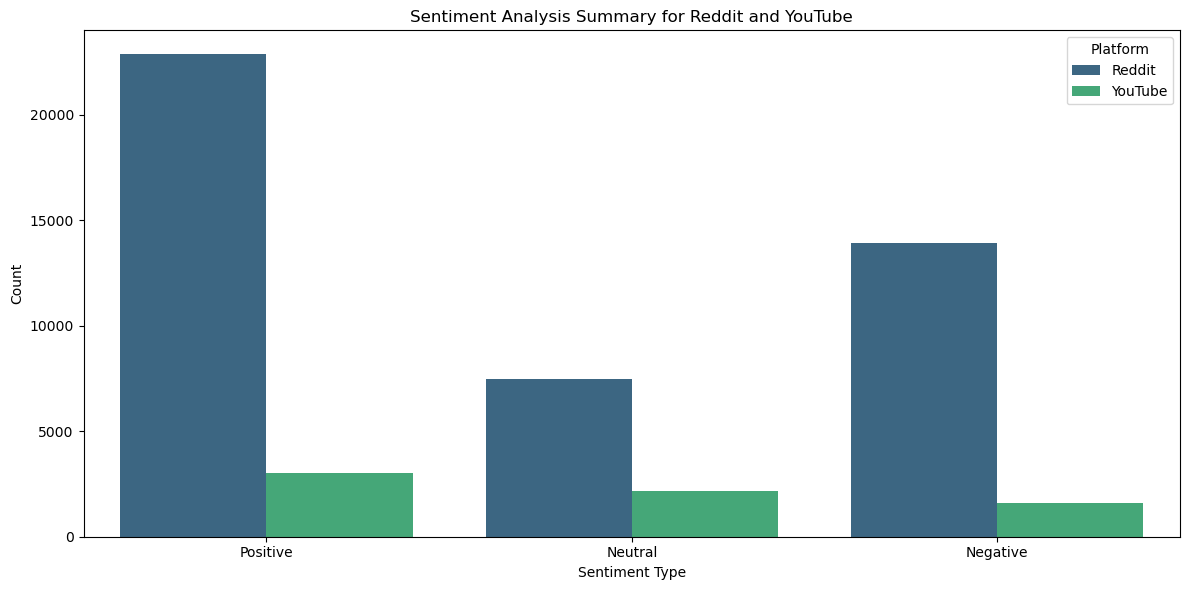

In [33]:
# Visualizing sentiment summary counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment', y='Count', hue='Platform', data=combined_sentiment_summary, palette='viridis')
plt.title("Sentiment Analysis Summary for Reddit and YouTube")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


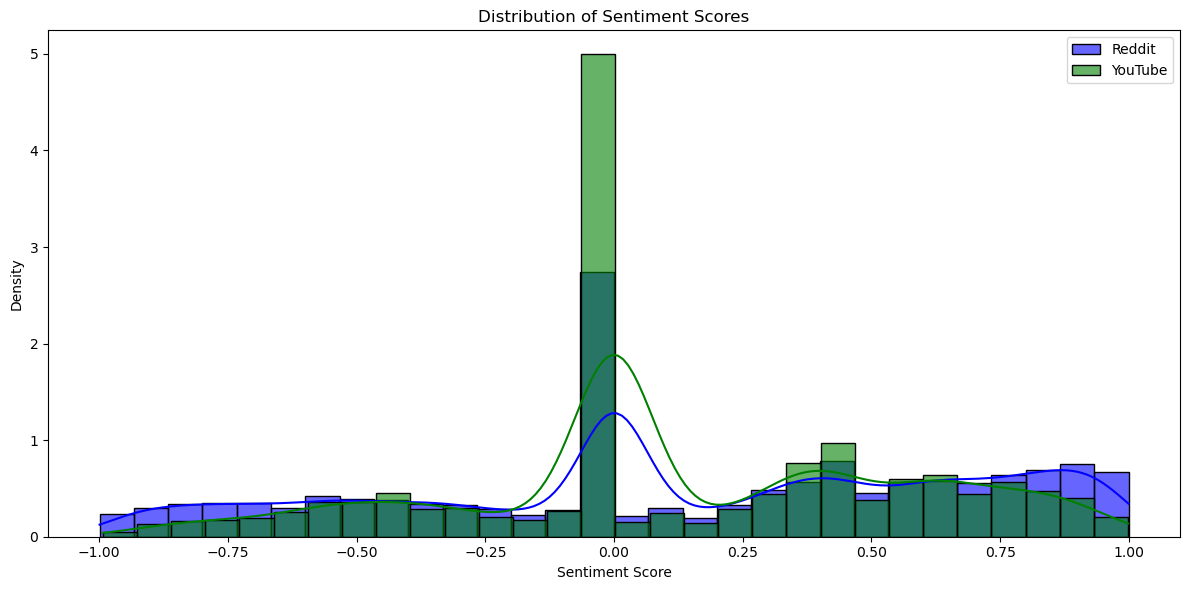

In [34]:
# Visualizing the distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(reddit_comments_df['sentiment_score'], bins=30, kde=True, color='blue', label='Reddit', stat='density', alpha=0.6)
sns.histplot(youtube_comments_df['sentiment_score'], bins=30, kde=True, color='green', label='YouTube', stat='density', alpha=0.6)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# Word clouds 

In [35]:
from wordcloud import WordCloud


In [36]:
# Prepare text for word clouds
positive_reddit_text = ' '.join(reddit_comments_df[reddit_comments_df['sentiment_score'] > 0]['comment_body'])
negative_reddit_text = ' '.join(reddit_comments_df[reddit_comments_df['sentiment_score'] < 0]['comment_body'])

positive_youtube_text = ' '.join(youtube_comments_df[youtube_comments_df['sentiment_score'] > 0]['comment_body'])
negative_youtube_text = ' '.join(youtube_comments_df[youtube_comments_df['sentiment_score'] < 0]['comment_body'])


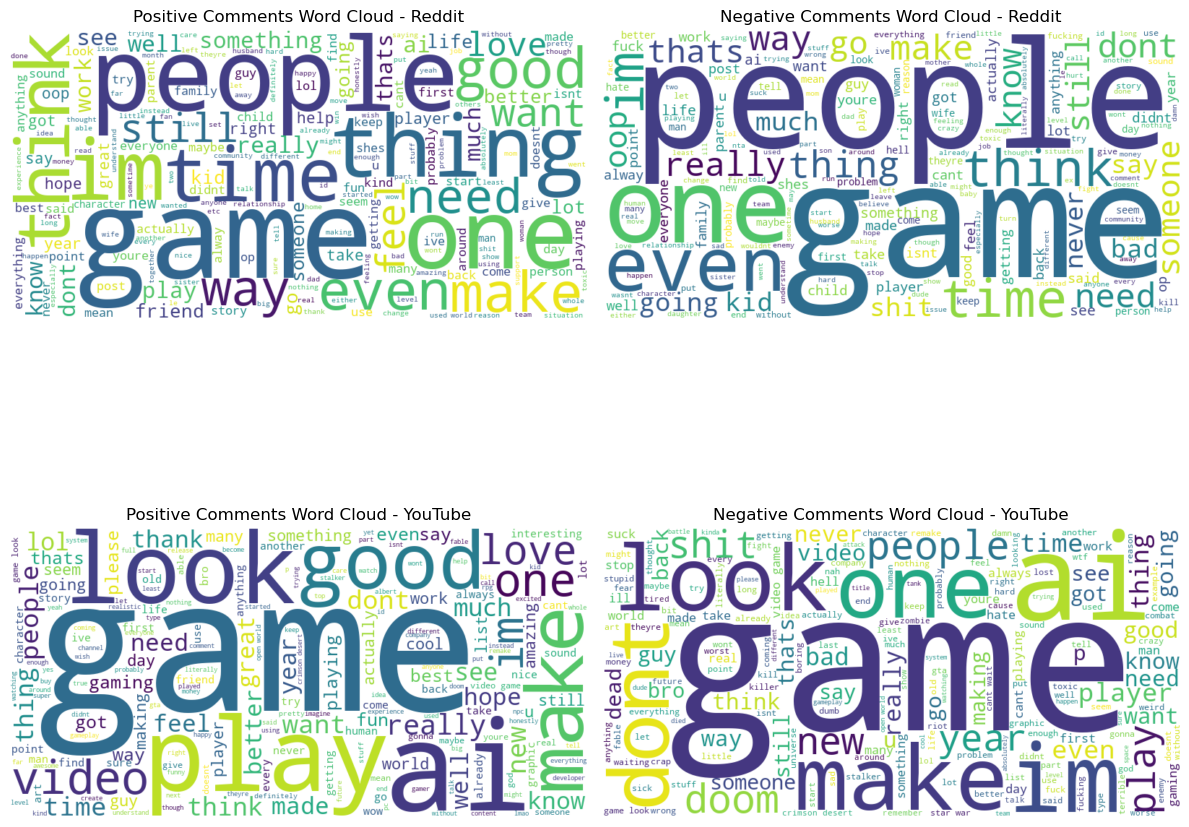

In [37]:
# Generate word clouds
wordcloud_positive_reddit = WordCloud(width=800, height=400, background_color='white').generate(positive_reddit_text)
wordcloud_negative_reddit = WordCloud(width=800, height=400, background_color='white').generate(negative_reddit_text)

wordcloud_positive_youtube = WordCloud(width=800, height=400, background_color='white').generate(positive_youtube_text)
wordcloud_negative_youtube = WordCloud(width=800, height=400, background_color='white').generate(negative_youtube_text)

# Plotting the word clouds
plt.figure(figsize=(12, 12))

# Reddit positive word cloud
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_positive_reddit, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud - Reddit')

# Reddit negative word cloud
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_negative_reddit, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments Word Cloud - Reddit')

# YouTube positive word cloud
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_positive_youtube, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud - YouTube')

# YouTube negative word cloud
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_negative_youtube, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments Word Cloud - YouTube')

plt.tight_layout()
plt.show()


## Topic Modeling using LDA

In [38]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text for LDA
def preprocess_for_lda(text):
    # Tokenize the text
    tokens = tokenize(text)
    
    # Lemmatize each token
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Preprocess Reddit comments for LDA
reddit_comments_for_lda = []
for entry in redditData:
    for comment in entry['comments']:
        tokens = preprocess_for_lda(comment['comment_body'])
        reddit_comments_for_lda.append(tokens)

# Preprocess YouTube comments for LDA
youtube_comments_for_lda = []
for entry in youtubeData:
    for comment in entry['comments']:
        tokens = preprocess_for_lda(comment['comment_body'])
        youtube_comments_for_lda.append(tokens)

In [40]:
# Create dictionary for Reddit comments
reddit_dictionary = corpora.Dictionary(reddit_comments_for_lda)

# Create corpus for Reddit comments
reddit_corpus = [reddit_dictionary.doc2bow(comment) for comment in reddit_comments_for_lda]

# Create dictionary for YouTube comments
youtube_dictionary = corpora.Dictionary(youtube_comments_for_lda)

# Create corpus for YouTube comments
youtube_corpus = [youtube_dictionary.doc2bow(comment) for comment in youtube_comments_for_lda]

In [41]:
# Set parameters for LDA model
num_topics = 10  # Number of topics to extract

# Train LDA model for Reddit
lda_reddit = LdaModel(corpus=reddit_corpus, id2word=reddit_dictionary, num_topics=num_topics, random_state=42, passes=10)

# Train LDA model for YouTube
lda_youtube = LdaModel(corpus=youtube_corpus, id2word=youtube_dictionary, num_topics=num_topics, random_state=42, passes=10)

In [42]:
# Function to extract and print only words from LDA topics
def print_topics(lda_model, num_topics):
    for idx, topic in lda_model.print_topics(num_topics):
        # Extract words only (remove probabilities)
        topic_words = " ".join([word.split("*")[1].replace('"', '').strip() for word in topic.split("+")])
        print(f"Topic {idx+1}: {topic_words}")

# Print Reddit topics
print("Reddit Topics:")
print_topics(lda_reddit, num_topics)

# Print YouTube topics
print("\nYouTube Topics:")
print_topics(lda_youtube, num_topics)

Reddit Topics:
Topic 1: wife police message safe call record red willing room unblock
Topic 2: like people dont one get would think time im make
Topic 3: game play playing player fun played video toxic team new
Topic 4: need armor behavior support report test deserve mistake change suggestion
Topic 5: player enemy weapon gun damage bug mission kill game team
Topic 6: mom back currency fan ive day beat cute team card
Topic 7: im look gonna lol good man love really cool like
Topic 8: animation thank art rayman buy look use ai therapy deleted
Topic 9: post please comment update season question sub contact removed restraining
Topic 10: kid would get sister family take want need nta know

YouTube Topics:
Topic 1: game im like look good doom one list cant really
Topic 2: p pc im time console gaming series jones gear oh
Topic 3: please god make dont really want art one friend game
Topic 4: age dragon remake blade hell veilguard phantom switch dokev zero
Topic 5: im like war look excited fan s

In [43]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# For Reddit
reddit_vis = gensimvis.prepare(lda_reddit, reddit_corpus, reddit_dictionary)
pyLDAvis.display(reddit_vis)

# For YouTube
youtube_vis = gensimvis.prepare(lda_youtube, youtube_corpus, youtube_dictionary)
pyLDAvis.display(youtube_vis)

## Network Analysis

In [44]:
import networkx as nx
import re
from collections import Counter
import matplotlib.pyplot as plt

In [45]:
# Function to extract interactions (mentions) from Reddit and YouTube data
def extract_mentions(data):
    interactions = []

    for entry in data:
        # Get mentions from title
        if 'title_mentions' in entry:
            for mention in entry['title_mentions']:
                interactions.append((entry['author'], mention.replace('@', '')))  # Edge from author to mentioned user

        # Process comments
        for comment in entry['comments']:
            if 'comment_mentions' in comment:
                for mention in comment['comment_mentions']:
                    interactions.append((comment['comment_author'], mention.replace('@', '')))  # Edge from comment author to mentioned user

    return interactions

In [46]:
# Extract mentions for Reddit and YouTube
reddit_interactions = extract_mentions(redditData)
youtube_interactions = extract_mentions(youtubeData)

In [47]:
# Create the graph for Reddit interactions
G_reddit = nx.DiGraph()  # DiGraph for directed graph
G_reddit.add_edges_from(reddit_interactions)

# Create the graph for YouTube interactions
G_youtube = nx.DiGraph()
G_youtube.add_edges_from(youtube_interactions)

In [48]:
# Centrality measures for Reddit
reddit_degree_centrality = nx.degree_centrality(G_reddit)
reddit_betweenness_centrality = nx.betweenness_centrality(G_reddit)
reddit_closeness_centrality = nx.closeness_centrality(G_reddit)

# Centrality measures for YouTube
youtube_degree_centrality = nx.degree_centrality(G_youtube)
youtube_betweenness_centrality = nx.betweenness_centrality(G_youtube)
youtube_closeness_centrality = nx.closeness_centrality(G_youtube)

# Identify top influencers by degree centrality
top_reddit_influencers = sorted(reddit_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_youtube_influencers = sorted(youtube_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [49]:
# Function to print top 10 influencers
def print_influencers(platform, influencers):
    print(f"Top 10 {platform} Influencers by Degree Centrality:")
    print("-" * 50)
    print(f"{'Rank':<5}{'Username':<25}{'Degree Centrality'}")
    print("-" * 50)
    for idx, (user, centrality) in enumerate(influencers, start=1):
        print(f"{idx:<5}{user:<25}{centrality:.4f}")
    print("\n")

# Print Reddit influencers
print_influencers("Reddit", top_reddit_influencers)

# Print  YouTube influencers
print_influencers("YouTube", top_youtube_influencers)

Top 10 Reddit Influencers by Degree Centrality:
--------------------------------------------------
Rank Username                 Degree Centrality
--------------------------------------------------
1    -Smaug                   0.0588
2    AutoModerator            0.0392
3    ss                       0.0392
4    Anonymous                0.0392
5    Shoddy-Media2337         0.0392
6    PandaCheese2016          0.0196
7    Civilization             0.0196
8    openai                   0.0196
9    wanderingnexus           0.0196
10   ChocolateAxis            0.0196


Top 10 YouTube Influencers by Degree Centrality:
--------------------------------------------------
Rank Username                 Degree Centrality
--------------------------------------------------
1    Greenskull               0.0714
2    3                        0.0714
3    gameranx                 0.0714
4    @rk-jn5mp                0.0357
5    0                        0.0357
6    @aidannortham9842        0.0357
7    @JSK

In [50]:
import community as community_louvain

# Convert directed graph to undirected for Reddit
G_reddit_undirected = G_reddit.to_undirected()

# Community detection for Reddit using the undirected graph
reddit_communities = community_louvain.best_partition(G_reddit_undirected)
reddit_community_sizes = Counter(reddit_communities.values())

# Convert directed graph to undirected for YouTube
G_youtube_undirected = G_youtube.to_undirected()

# Community detection for YouTube using the undirected graph
youtube_communities = community_louvain.best_partition(G_youtube_undirected)
youtube_community_sizes = Counter(youtube_communities.values())


In [51]:
# Function to print community sizes in a formatted way
def print_community_sizes(platform, community_sizes):
    print(f"{platform} Community Sizes:")
    print(f"{'Community':<15}{'Number of Users'}")
    print("-" * 30)
    for community, size in sorted(community_sizes.items()):
        print(f"{community:<15}{size}")
    print("\n")

# Print Reddit community sizes
print_community_sizes("Reddit", reddit_community_sizes)

# Print YouTube community sizes
print_community_sizes("YouTube", youtube_community_sizes)

Reddit Community Sizes:
Community      Number of Users
------------------------------
0              3
1              2
2              3
3              2
4              3
5              2
6              2
7              2
8              4
9              2
10             2
11             2
12             2
13             2
14             2
15             2
16             2
17             2
18             2
19             3
20             2
21             2
22             2


YouTube Community Sizes:
Community      Number of Users
------------------------------
0              2
1              2
2              3
3              2
4              2
5              3
6              2
7              2
8              2
9              2
10             2
11             2
12             3




In [52]:
# Edge weights for Reddit (frequency of interactions between users)
reddit_edge_weights = Counter(reddit_interactions)
youtube_edge_weights = Counter(youtube_interactions)

In [53]:
# Function to print interactions in a formatted way
def print_top_interactions(platform, interactions):
    print(f"Top 10 {platform} Interactions by Mentions:")
    print(f"{'User 1':<25}{'User 2':<25}{'Mentions'}")
    print("-" * 60)
    for (user1, user2), mentions in interactions:  # Unpacking the tuple
        print(f"{user1:<25}{user2:<25}{mentions}")
    print("\n")

# Print nicely formatted Reddit interactions
print_top_interactions("Reddit", reddit_edge_weights.most_common(10))

# Print nicely formatted YouTube interactions
print_top_interactions("YouTube", youtube_edge_weights.most_common(10))


Top 10 Reddit Interactions by Mentions:
User 1                   User 2                   Mentions
------------------------------------------------------------
SharpCoderC              DevKxm                   4
AutoModerator            openai                   3
AutoModerator            hiraedu                  2
DyingOnHills             51bworld                 2
devilmasterrace          gmail                    2
PandaCheese2016          Civilization             1
wanderingnexus           ss                       1
ChocolateAxis            zigzagame                1
PCMRBot                  home                     1
PrepperLady999           ExpertlyAmateur          1


Top 10 YouTube Interactions by Mentions:
User 1                   User 2                   Mentions
------------------------------------------------------------
@rk-jn5mp                0                        1
@aidannortham9842        Greenskull               1
@JSK010                  3                        1
@

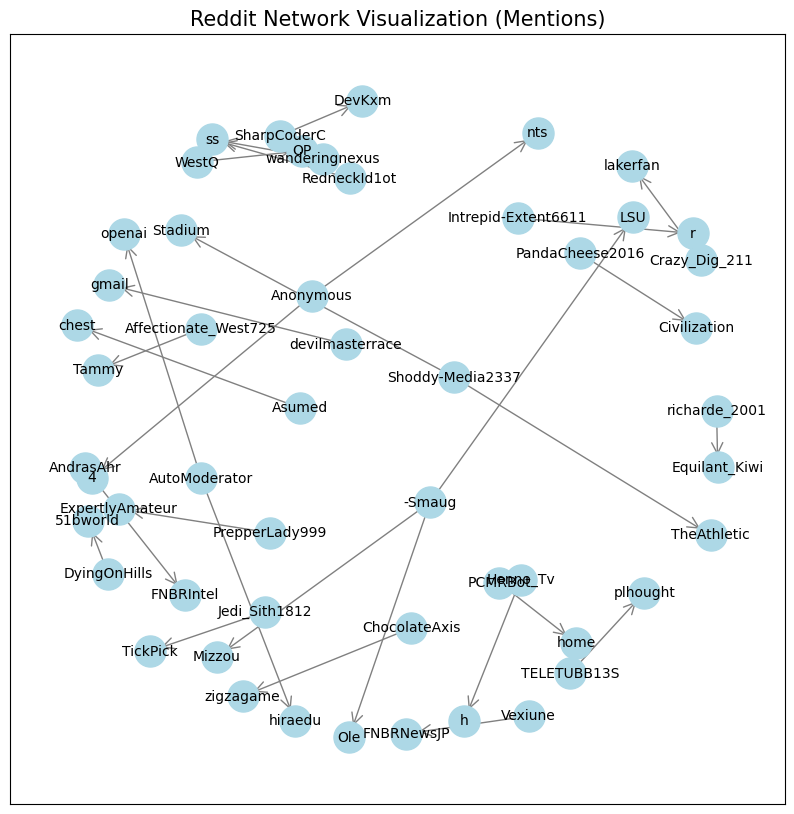

In [54]:
# Function to visualize the network
def visualize_network(graph, title):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, k=0.5, seed=42)  # Positioning nodes
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="lightblue")
    nx.draw_networkx_edges(graph, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color="black")
    
    plt.title(title, size=15)
    plt.show()

# Visualize the Reddit network
visualize_network(G_reddit, "Reddit Network Visualization (Mentions)")

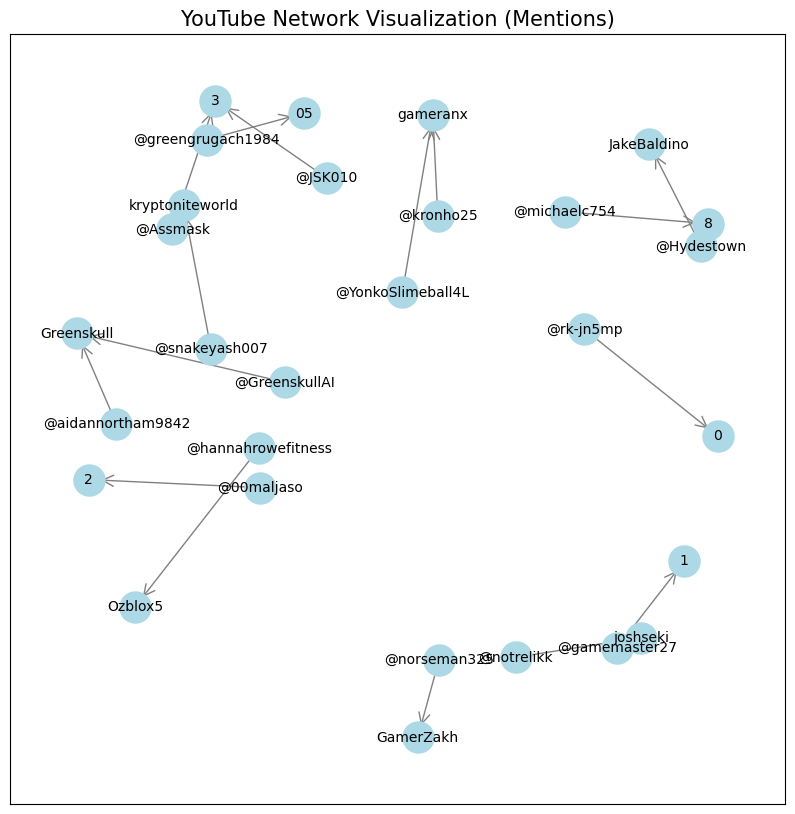

In [55]:
# Visualize the YouTube network
visualize_network(G_youtube, "YouTube Network Visualization (Mentions)")

## Comparative Analysis of Subcultures

In [56]:
# Define keyword lists for each subculture
casual_keywords = ['relax', 'fun', 'casual', 'calm']
esports_keywords = ['esports', 'competitive', 'tournament', 'battle royale', 'csgo', 'valorant']

# Function to assign a subculture based on keywords
def assign_subculture(text):
    text_lower = text.lower()
    if any(word in text_lower for word in casual_keywords):
        return 'Casual Gamers'
    elif any(word in text_lower for word in esports_keywords):
        return 'Esports Fans'
    else:
        return 'Uncategorized'

# Apply the function to both Reddit and YouTube data
for entry in redditData:
    entry['subculture'] = assign_subculture(entry['title'])
    for comment in entry['comments']:
        comment['subculture'] = assign_subculture(comment['comment_body'])

for entry in youtubeData:
    entry['subculture'] = assign_subculture(entry['title'])
    for comment in entry['comments']:
        comment['subculture'] = assign_subculture(comment['comment_body'])

In [58]:
# Sentiment analysis by subculture for Reddit
subculture_sentiment_reddit = {'Casual Gamers': [], 'Esports Fans': []}

for entry in redditData:
    for comment in entry['comments']:
        score = comment['sentiment_score']  # Use existing sentiment score
        subculture = comment['subculture']
        if subculture in subculture_sentiment_reddit:
            subculture_sentiment_reddit[subculture].append(score)

# Sentiment analysis by subculture for YouTube
subculture_sentiment_youtube = {'Casual Gamers': [], 'Esports Fans': []}

for entry in youtubeData:
    for comment in entry['comments']:
        score = comment['sentiment_score']  # Use existing sentiment score
        subculture = comment['subculture']
        if subculture in subculture_sentiment_youtube:
            subculture_sentiment_youtube[subculture].append(score)

# Average sentiment for each subculture (Reddit)
avg_sentiment_reddit = {subculture: np.mean(scores) for subculture, scores in subculture_sentiment_reddit.items()}

# Average sentiment for each subculture (YouTube)
avg_sentiment_youtube = {subculture: np.mean(scores) for subculture, scores in subculture_sentiment_youtube.items()}

In [61]:
print(avg_sentiment_reddit)
print(avg_sentiment_youtube)

{'Casual Gamers': 0.3944539406779661, 'Esports Fans': 0.18035836734693875}
{'Casual Gamers': 0.5597558510638297, 'Esports Fans': 0.1737392857142857}


C:\Users\aswin\AppData\Local\Temp\ipykernel_48728\3477543401.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subculture', y='Count', hue='Sentiment', data=sentiment_df, palette='viridis', ci=None)  # ci=None removes the lines
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

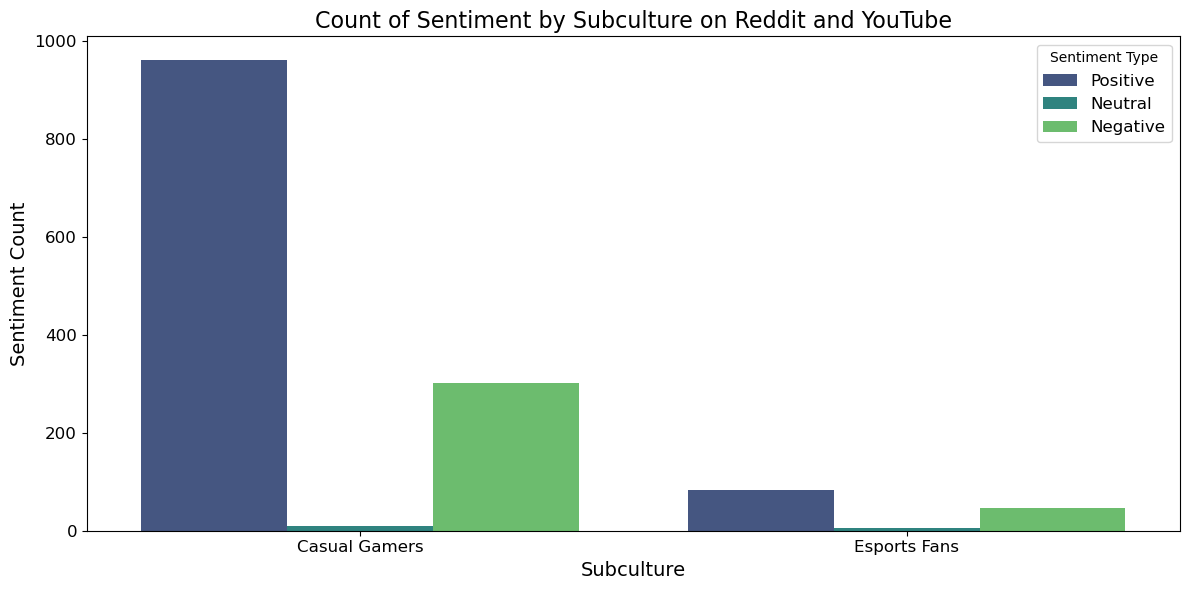

In [63]:
# Initialize dictionaries to hold sentiment counts for each subculture
subculture_sentiment_counts_reddit = {'Casual Gamers': {'positive': 0, 'neutral': 0, 'negative': 0},
                                      'Esports Fans': {'positive': 0, 'neutral': 0, 'negative': 0}}

subculture_sentiment_counts_youtube = {'Casual Gamers': {'positive': 0, 'neutral': 0, 'negative': 0},
                                       'Esports Fans': {'positive': 0, 'neutral': 0, 'negative': 0}}

# Count sentiment occurrences for Reddit
for entry in redditData:
    for comment in entry['comments']:
        subculture = comment['subculture']
        sentiment_score = comment['sentiment_score']
        if subculture in subculture_sentiment_counts_reddit:
            if sentiment_score > 0:
                subculture_sentiment_counts_reddit[subculture]['positive'] += 1
            elif sentiment_score == 0:
                subculture_sentiment_counts_reddit[subculture]['neutral'] += 1
            else:
                subculture_sentiment_counts_reddit[subculture]['negative'] += 1

# Count sentiment occurrences for YouTube
for entry in youtubeData:
    for comment in entry['comments']:
        subculture = comment['subculture']
        sentiment_score = comment['sentiment_score']
        if subculture in subculture_sentiment_counts_youtube:
            if sentiment_score > 0:
                subculture_sentiment_counts_youtube[subculture]['positive'] += 1
            elif sentiment_score == 0:
                subculture_sentiment_counts_youtube[subculture]['neutral'] += 1
            else:
                subculture_sentiment_counts_youtube[subculture]['negative'] += 1

# Convert the counts into a DataFrame for visualization
sentiment_df = pd.DataFrame({
    'Platform': ['Reddit'] * 6 + ['YouTube'] * 6,
    'Subculture': ['Casual Gamers'] * 3 + ['Esports Fans'] * 3 + ['Casual Gamers'] * 3 + ['Esports Fans'] * 3,
    'Sentiment': ['Positive', 'Neutral', 'Negative'] * 4,
    'Count': [subculture_sentiment_counts_reddit['Casual Gamers']['positive'],
              subculture_sentiment_counts_reddit['Casual Gamers']['neutral'],
              subculture_sentiment_counts_reddit['Casual Gamers']['negative'],
              subculture_sentiment_counts_reddit['Esports Fans']['positive'],
              subculture_sentiment_counts_reddit['Esports Fans']['neutral'],
              subculture_sentiment_counts_reddit['Esports Fans']['negative'],
              subculture_sentiment_counts_youtube['Casual Gamers']['positive'],
              subculture_sentiment_counts_youtube['Casual Gamers']['neutral'],
              subculture_sentiment_counts_youtube['Casual Gamers']['negative'],
              subculture_sentiment_counts_youtube['Esports Fans']['positive'],
              subculture_sentiment_counts_youtube['Esports Fans']['neutral'],
              subculture_sentiment_counts_youtube['Esports Fans']['negative']]
})

# Visualizing the sentiment counts by subculture and platform without error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Subculture', y='Count', hue='Sentiment', data=sentiment_df, palette='viridis', ci=None)  # ci=None removes the lines
plt.title("Count of Sentiment by Subculture on Reddit and YouTube", fontsize=16)
plt.xlabel("Subculture", fontsize=14)
plt.ylabel("Sentiment Count", fontsize=14)
plt.legend(title='Sentiment Type', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

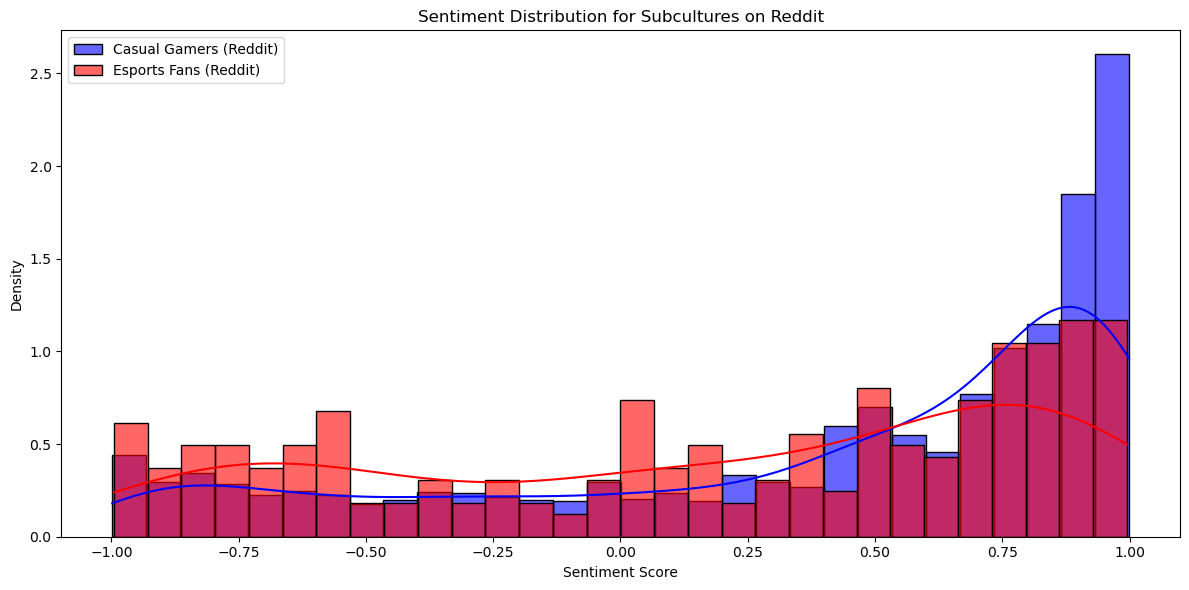

C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

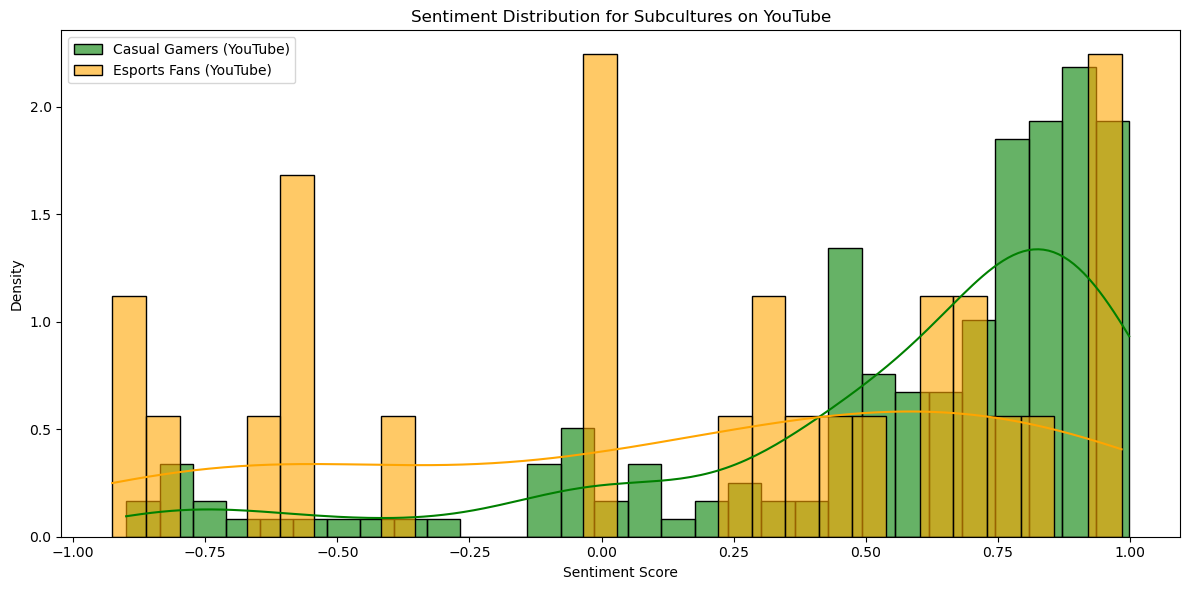

In [60]:
# Visualizing sentiment distribution by subculture for Reddit
plt.figure(figsize=(12, 6))
sns.histplot([score for score in subculture_sentiment_reddit['Casual Gamers']], bins=30, kde=True, color='blue', label='Casual Gamers (Reddit)', stat='density', alpha=0.6)
sns.histplot([score for score in subculture_sentiment_reddit['Esports Fans']], bins=30, kde=True, color='red', label='Esports Fans (Reddit)', stat='density', alpha=0.6)
plt.title("Sentiment Distribution for Subcultures on Reddit")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Similarly for YouTube
plt.figure(figsize=(12, 6))
sns.histplot([score for score in subculture_sentiment_youtube['Casual Gamers']], bins=30, kde=True, color='green', label='Casual Gamers (YouTube)', stat='density', alpha=0.6)
sns.histplot([score for score in subculture_sentiment_youtube['Esports Fans']], bins=30, kde=True, color='orange', label='Esports Fans (YouTube)', stat='density', alpha=0.6)
plt.title("Sentiment Distribution for Subcultures on YouTube")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
# Preprocess text for LDA for each subculture (Casual Gamers and Esports Fans)
def preprocess_subculture_comments(data, subculture):
    subculture_comments = []
    for entry in data:
        for comment in entry['comments']:
            if comment['subculture'] == subculture:
                tokens = preprocess_for_lda(comment['comment_body'])
                subculture_comments.append(tokens)
    return subculture_comments

# Preprocess comments for LDA
casual_comments = preprocess_subculture_comments(redditData, 'Casual Gamers')
esports_comments = preprocess_subculture_comments(redditData, 'Esports Fans')

# LDA for Casual Gamers
casual_dictionary = corpora.Dictionary(casual_comments)
casual_corpus = [casual_dictionary.doc2bow(comment) for comment in casual_comments]
lda_casual = LdaModel(casual_corpus, id2word=casual_dictionary, num_topics=5, random_state=42, passes=10)

# LDA for Esports Fans
esports_dictionary = corpora.Dictionary(esports_comments)
esports_corpus = [esports_dictionary.doc2bow(comment) for comment in esports_comments]
lda_esports = LdaModel(esports_corpus, id2word=esports_dictionary, num_topics=5, random_state=42, passes=10)

# Print topics
print("Topics for Casual Gamers:")
print_topics(lda_casual, 5)

print("\nTopics for Esports Fans:")
print_topics(lda_esports, 5)

Topics for Casual Gamers:
Topic 1: like ai fun would game even one get look want
Topic 2: game fun like people player dont play get feel make
Topic 3: game fun like dont get im play one even really
Topic 4: fun game like im get look year playing play got
Topic 5: like people one get dont year im even time know

Topics for Esports Fans:
Topic 1: game competitive like time people toxic ive player get would
Topic 2: game like league people competitive one feel play made would
Topic 3: competitive people game dont play toxic like valorant tournament tech
Topic 4: game like people competitive year play ai tournament get dont
Topic 5: game competitive play like dont get team think much playing


In [65]:
# Engagement (average number of comments per post/video)
def calculate_engagement(data, subculture_key='subculture'):
    engagement_counts = {'Casual Gamers': [], 'Esports Fans': []}
    
    for entry in data:
        subculture = entry[subculture_key]
        comment_count = len(entry['comments'])
        if subculture in engagement_counts:
            engagement_counts[subculture].append(comment_count)
    
    avg_engagement = {key: np.mean(values) for key, values in engagement_counts.items()}
    return avg_engagement

# Engagement for Reddit
reddit_engagement = calculate_engagement(redditData)
print("Reddit Engagement by Subculture:", reddit_engagement)

# Engagement for YouTube
youtube_engagement = calculate_engagement(youtubeData)
print("YouTube Engagement by Subculture:", youtube_engagement)

Reddit Engagement by Subculture: {'Casual Gamers': 36.857142857142854, 'Esports Fans': 44.333333333333336}
YouTube Engagement by Subculture: {'Casual Gamers': 0.0, 'Esports Fans': 34.666666666666664}
